In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':100})

In [2]:
import warnings

warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import pandas as pd
import matplotlib.pyplot as plt
import itertools as it
import statsmodels.api as sm
import numpy as np

In [3]:
df = pd.read_csv('offer3MParisfiltered.csv')

In [4]:
df.head()

,Trimestre,NB_VACANCIES_CREATION,DEPARTEMENT_CODE,ROME_PROFESSION_CARD_CODE,ROME_PROFESSION_CARD_NAME
0,4e trimestre 2020,0,75,A1202,Entretien des espaces naturels
1,3e trimestre 2020,0,75,A1202,Entretien des espaces naturels
2,2e trimestre 2020,0,75,A1202,Entretien des espaces naturels
3,1er trimestre 2020,0,75,A1202,Entretien des espaces naturels
4,4e trimestre 2019,0,75,A1202,Entretien des espaces naturels


In [5]:
#df.groupby('ROME_PROFESSION_CARD_NAME').NB_VACANCIES_CREATION.sum().sort_values().plot(kind = 'bar')

In [6]:
df.Trimestre = df.Trimestre.str.replace('4e trimestre', '4-')
df.Trimestre = df.Trimestre.str.replace('3e trimestre', '3-' )
df.Trimestre = df.Trimestre.str.replace('2e trimestre', '2-' )
df.Trimestre = df.Trimestre.str.replace('1er trimestre', '1-')

In [7]:
df.head(10)

,Trimestre,NB_VACANCIES_CREATION,DEPARTEMENT_CODE,ROME_PROFESSION_CARD_CODE,ROME_PROFESSION_CARD_NAME
0,4- 2020,0,75,A1202,Entretien des espaces naturels
1,3- 2020,0,75,A1202,Entretien des espaces naturels
2,2- 2020,0,75,A1202,Entretien des espaces naturels
3,1- 2020,0,75,A1202,Entretien des espaces naturels
4,4- 2019,0,75,A1202,Entretien des espaces naturels
5,3- 2019,0,75,A1202,Entretien des espaces naturels
6,2- 2019,0,75,A1202,Entretien des espaces naturels
7,1- 2019,0,75,A1202,Entretien des espaces naturels
8,4- 2018,0,75,A1202,Entretien des espaces naturels
9,3- 2018,0,75,A1202,Entretien des espaces naturels


In [8]:
df.shape

(2948, 5)

In [9]:
df_intrpltn = df[['Trimestre', 'NB_VACANCIES_CREATION', 'ROME_PROFESSION_CARD_NAME']]

In [10]:
df_intrpltn

,Trimestre,NB_VACANCIES_CREATION,ROME_PROFESSION_CARD_NAME
0,4- 2020,0,Entretien des espaces naturels
1,3- 2020,0,Entretien des espaces naturels
2,2- 2020,0,Entretien des espaces naturels
3,1- 2020,0,Entretien des espaces naturels
4,4- 2019,0,Entretien des espaces naturels
...,...,...,...
2943,1- 2011,100,Technicien logistique
2944,4- 2010,70,Technicien logistique
2945,3- 2010,80,Technicien logistique
2946,2- 2010,110,Technicien logistique


In [11]:
df_intrpltn['datetime'] = pd.to_datetime(df_intrpltn['Trimestre'])
del df_intrpltn['Trimestre']

<ipython-input-11-642a65d8253f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_intrpltn['datetime'] = pd.to_datetime(df_intrpltn['Trimestre'])


In [12]:
df_intrpltn.set_index(['datetime', 'ROME_PROFESSION_CARD_NAME'])

,,NB_VACANCIES_CREATION
datetime,ROME_PROFESSION_CARD_NAME,
2020-04-01,Entretien des espaces naturels,0
2020-03-01,Entretien des espaces naturels,0
2020-02-01,Entretien des espaces naturels,0
2020-01-01,Entretien des espaces naturels,0
2019-04-01,Entretien des espaces naturels,0
...,...,...
2011-01-01,Technicien logistique,100
2010-04-01,Technicien logistique,70
2010-03-01,Technicien logistique,80


In [13]:
#df_interpolated = df_intrpltn['NB_VACANCIES_CREATION'].interpolate()

In [14]:
#df_interpolated

In [104]:
df19=df[df.Trimestre.str.endswith('19')].copy()

In [105]:
df19.loc[:,'NB_VACANCIES_CREATION']=df19.NB_VACANCIES_CREATION/3

In [106]:
df19.Trimestre=pd.to_datetime(df19.Trimestre.str.get(0).map({'4':'12/2019', '3':'8/2019', '2':'5/2019', '1':'1/2019'}))

In [107]:
df19.drop(['DEPARTEMENT_CODE','ROME_PROFESSION_CARD_CODE'], axis=1, inplace=True)

In [108]:
df19.set_index('Trimestre', inplace=True)

In [109]:
df19.columns

Index(['NB_VACANCIES_CREATION', 'ROME_PROFESSION_CARD_NAME'], dtype='object')

In [110]:
df_interpol = df19.groupby('ROME_PROFESSION_CARD_NAME')\
                .resample('M')\
                .mean()
df_interpol['readvalue'] = df_interpol['NB_VACANCIES_CREATION'].interpolate()
df_interpol

NB_VACANCIES_CREATION  \
ROME_PROFESSION_CARD_NAME                          Trimestre                           
Accompagnement de voyages, d'activités culturel... 2019-01-31              13.333333   
                                                   2019-02-28                    NaN   
                                                   2019-03-31                    NaN   
                                                   2019-04-30                    NaN   
                                                   2019-05-31               6.666667   
...                                                                              ...   
Vente en habillement et accessoires de la personne 2019-08-31             153.333333   
                                                   2019-09-30                    NaN   
                                                   2019-10-31                    NaN   
                                                   2019-11-30                    NaN   
                                                   2019-12-31             166.666667   

                                                                readvalue  
ROME_PROFESSION_CARD_NAME                          Trimestre               
Accompagnement de voyages, d'activités culturel... 2019-01-31   13.333333  
                                                   2019-02-28   11.666667  
                                                   2019-03-31   10.000000  
                                                   2019-04-30    8.333333  
                                                   2019-05-31    6.666667  
...                                                                   ...  
Vente en habillement et accessoires de la personne 2019-08-31  153.333333  
                                                   2019-09-30  156.666667  
                                                   2019-10-31  160.000000  
                                                   2019-11-30  163.333333  
                                                   2019-12-31  166.666667  

[804 rows x 2 columns]

In [111]:
df_interpol['order']=df_interpol.reset_index().Trimestre.dt.month.map(lambda x: (x-1)//3+1).to_frame().set_index(df_interpol.index)
df_interpol['innerorder']=df_interpol.reset_index().Trimestre.dt.month.map(lambda x: (x-1)%3+1).to_frame().set_index(df_interpol.index)

In [112]:
df_interpol=df_interpol.reset_index()

In [113]:
df_interpol

,ROME_PROFESSION_CARD_NAME,Trimestre,NB_VACANCIES_CREATION,readvalue,order,innerorder
0,"Accompagnement de voyages, d'activités culture...",2019-01-31,13.333333,13.333333,1,1
1,"Accompagnement de voyages, d'activités culture...",2019-02-28,NaN,11.666667,1,2
2,"Accompagnement de voyages, d'activités culture...",2019-03-31,NaN,10.000000,1,3
3,"Accompagnement de voyages, d'activités culture...",2019-04-30,NaN,8.333333,2,1
4,"Accompagnement de voyages, d'activités culture...",2019-05-31,6.666667,6.666667,2,2
...,...,...,...,...,...,...
799,Vente en habillement et accessoires de la pers...,2019-08-31,153.333333,153.333333,3,2
800,Vente en habillement et accessoires de la pers...,2019-09-30,NaN,156.666667,3,3
801,Vente en habillement et accessoires de la pers...,2019-10-31,NaN,160.000000,4,1
802,Vente en habillement et accessoires de la pers...,2019-11-30,NaN,163.333333,4,2


In [120]:
df_new=pd.pivot_table(index=['ROME_PROFESSION_CARD_NAME','order'], columns='innerorder', values='readvalue', data=df_interpol)

In [121]:
df_new.sum(axis=1)

ROME_PROFESSION_CARD_NAME                                        order
Accompagnement de voyages, d'activités culturelles ou sportives  1          35.000000
                                                                 2          21.666667
                                                                 3          20.833333
                                                                 4          27.500000
Accueil et renseignements                                        1        1075.000000
                                                                             ...     
Vente en gros de produits frais                                  4           0.000000
Vente en habillement et accessoires de la personne               1         707.500000
                                                                 2         650.833333
                                                                 3         486.666667
                                                                 4   

In [124]:
df_summed=df_new.sum(axis=1)

In [125]:
df_new[1]=df_new[1]/df_summed
df_new[2]=df_new[2]/df_summed
df_new[3]=df_new[3]/df_summed

In [126]:
df_new.fillna(0)

innerorder                                                       1         2  \
ROME_PROFESSION_CARD_NAME                          order                       
Accompagnement de voyages, d'activités culturel... 1      0.380952  0.333333   
                                                   2      0.384615  0.307692   
                                                   3      0.320000  0.320000   
                                                   4      0.303030  0.333333   
Accueil et renseignements                          1      0.325581  0.333333   
...                                                            ...       ...   
Vente en gros de produits frais                    4      0.000000  0.000000   
Vente en habillement et accessoires de la personne 1      0.339223  0.333333   
                                                   2      0.349552  0.343150   
                                                   3      0.363014  0.315068   
                                                   4      0.326531  0.333333   

innerorder                                                       3  
ROME_PROFESSION_CARD_NAME                          order            
Accompagnement de voyages, d'activités culturel... 1      0.285714  
                                                   2      0.307692  
                                                   3      0.360000  
                                                   4      0.363636  
Accueil et renseignements                          1      0.341085  
...                                                            ...  
Vente en gros de produits frais                    4      0.000000  
Vente en habillement et accessoires de la personne 1      0.327444  
                                                   2      0.307298  
                                                   3      0.321918  
                                                   4      0.340136  

[268 rows x 3 columns]

In [86]:
df_new.melt(ignore_index=False)

innerorder     value
ROME_PROFESSION_CARD_NAME                          order                      
Accompagnement de voyages, d'activités culturel... 1               1  0.380952
                                                   2               1  0.384615
                                                   3               1  0.320000
                                                   4               1  0.303030
Accueil et renseignements                          1               1  0.325581
...                                                              ...       ...
Vente en gros de produits frais                    4               3       NaN
Vente en habillement et accessoires de la personne 1               3  0.996373
                                                   2               3  0.995636
                                                   3               3  0.994559
                                                   4               3  0.995098

[804 rows x 2 columns]

In [127]:
df19=df[df.Trimestre.str.endswith('19')].copy()

In [128]:
df19['order']=df19.Trimestre.str.get(0).astype(int)

In [129]:
df19

,Trimestre,NB_VACANCIES_CREATION,DEPARTEMENT_CODE,ROME_PROFESSION_CARD_CODE,ROME_PROFESSION_CARD_NAME,order
4,4- 2019,0,75,A1202,Entretien des espaces naturels,4
5,3- 2019,0,75,A1202,Entretien des espaces naturels,3
6,2- 2019,0,75,A1202,Entretien des espaces naturels,2
7,1- 2019,0,75,A1202,Entretien des espaces naturels,1
48,4- 2019,70,75,A1203,Entretien des espaces verts,4
...,...,...,...,...,...,...
2867,1- 2019,290,75,N1105,Manutention manuelle de charges,1
2908,4- 2019,140,75,N1303,Technicien logistique,4
2909,3- 2019,130,75,N1303,Technicien logistique,3
2910,2- 2019,210,75,N1303,Technicien logistique,2


In [130]:
df19S=df19[['ROME_PROFESSION_CARD_NAME','order','NB_VACANCIES_CREATION']].set_index(['ROME_PROFESSION_CARD_NAME','order'])

In [131]:
df19S

NB_VACANCIES_CREATION
ROME_PROFESSION_CARD_NAME       order                       
Entretien des espaces naturels  4                          0
                                3                          0
                                2                          0
                                1                          0
Entretien des espaces verts     4                         70
...                                                      ...
Manutention manuelle de charges 1                        290
Technicien logistique           4                        140
                                3                        130
                                2                        210
                                1                        200

[268 rows x 1 columns]

In [132]:
df_new

innerorder                                                       1         2  \
ROME_PROFESSION_CARD_NAME                          order                       
Accompagnement de voyages, d'activités culturel... 1      0.380952  0.333333   
                                                   2      0.384615  0.307692   
                                                   3      0.320000  0.320000   
                                                   4      0.303030  0.333333   
Accueil et renseignements                          1      0.325581  0.333333   
...                                                            ...       ...   
Vente en gros de produits frais                    4           NaN       NaN   
Vente en habillement et accessoires de la personne 1      0.339223  0.333333   
                                                   2      0.349552  0.343150   
                                                   3      0.363014  0.315068   
                                                   4      0.326531  0.333333   

innerorder                                                       3  
ROME_PROFESSION_CARD_NAME                          order            
Accompagnement de voyages, d'activités culturel... 1      0.285714  
                                                   2      0.307692  
                                                   3      0.360000  
                                                   4      0.363636  
Accueil et renseignements                          1      0.341085  
...                                                            ...  
Vente en gros de produits frais                    4           NaN  
Vente en habillement et accessoires de la personne 1      0.327444  
                                                   2      0.307298  
                                                   3      0.321918  
                                                   4      0.340136  

[268 rows x 3 columns]

In [133]:
df_new[1]=df_new[1]*df19S.NB_VACANCIES_CREATION
df_new[2]=df_new[2]*df19S.NB_VACANCIES_CREATION
df_new[3]=df_new[3]*df19S.NB_VACANCIES_CREATION

In [137]:
dffin=df_new.round().melt(ignore_index=False).fillna(0).reset_index()

In [139]:
dffin['MONTH']=(dffin.order-1)*3+dffin.innerorder

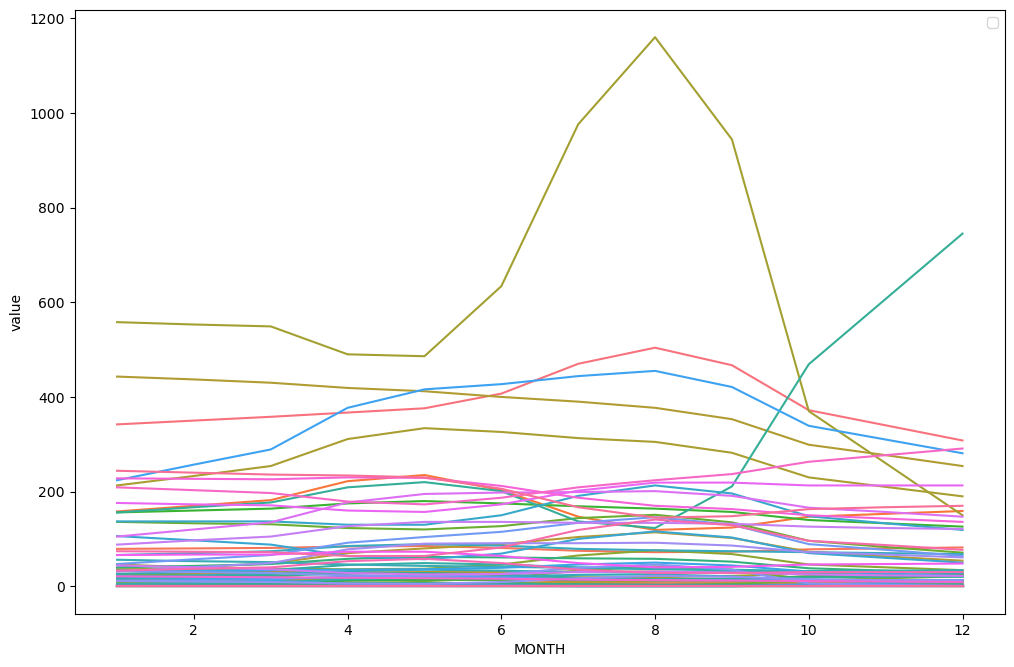

In [149]:
import seaborn as sns
sns.lineplot(data=dffin, x='MONTH', y='value', hue='ROME_PROFESSION_CARD_NAME')
plt.legend('')

In [155]:
dffin.sort_values(by=['ROME_PROFESSION_CARD_NAME','MONTH'], inplace=True)

In [157]:
import plotly.express as px
#dffin=dffin.sort_index()
#df = px.data.gapminder().query("continent != 'Asia'") # remove Asia for visibility
fig = px.line(dffin, x="MONTH", y="value", color="ROME_PROFESSION_CARD_NAME")
#              line_group="country", hover_name="country")
fig.show()

<AxesSubplot:xlabel='ROME_PROFESSION_CARD_NAME,MONTH'>

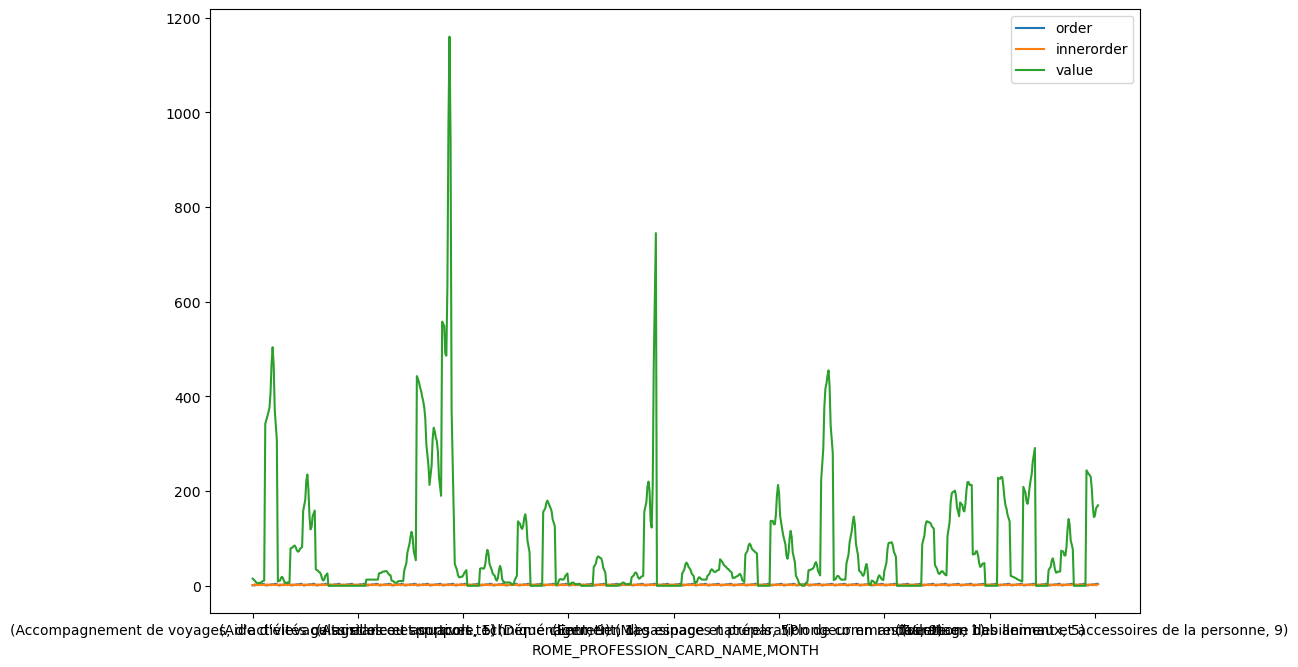

In [144]:
dffin.set_index(['ROME_PROFESSION_CARD_NAME', 'MONTH']).sort_index().plot()

In [159]:
dffin.to_csv('/Users/teahupoo20/Documents/GitHub/FINAL_PROJECT/dfoffer19smooth.csv')

In [38]:
df[df.ROME_PROFESSION_CARD_NAME=="Accompagnement de voyages, d'activités culturelles ou sportives"]

,Trimestre,NB_VACANCIES_CREATION,DEPARTEMENT_CODE,ROME_PROFESSION_CARD_CODE,ROME_PROFESSION_CARD_NAME
1320,4- 2020,0,75,G1201,"Accompagnement de voyages, d'activités culture..."
1321,3- 2020,0,75,G1201,"Accompagnement de voyages, d'activités culture..."
1322,2- 2020,10,75,G1201,"Accompagnement de voyages, d'activités culture..."
1323,1- 2020,10,75,G1201,"Accompagnement de voyages, d'activités culture..."
1324,4- 2019,30,75,G1201,"Accompagnement de voyages, d'activités culture..."
1325,3- 2019,20,75,G1201,"Accompagnement de voyages, d'activités culture..."
1326,2- 2019,20,75,G1201,"Accompagnement de voyages, d'activités culture..."
1327,1- 2019,40,75,G1201,"Accompagnement de voyages, d'activités culture..."
1328,4- 2018,30,75,G1201,"Accompagnement de voyages, d'activités culture..."
1329,3- 2018,30,75,G1201,"Accompagnement de voyages, d'activités culture..."


In [27]:
import random
data = {'datetime' : pd.date_range(start='1/15/2018',
                                  end='02/14/2018', 
                                  freq='D')\
                     .append(pd.date_range(start='1/15/2018',
                                           end='02/14/2018',
                                           freq='D')),
        'house' : ['house1' for i in range(31)] 
                  + ['house2' for i in range(31)],
        'readvalue' : [0.5 + 0.5*np.sin(2*np.pi/30*i) 
                       for i in range(31)]\
                     + [0.5 + 0.5*np.cos(2*np.pi/30*i) 
                       for i in range(31)]}
df0 = pd.DataFrame(data, columns = ['readdatetime', 
                                    'house', 
                                    'readvalue'])

In [28]:
df0=pd.DataFrame(data)
df0.columns=['readdatetime', 'house','readvalue']

In [29]:
df0=df0.sample(31)

In [30]:
df0=df0.sort_values(by=['house','readdatetime'])

In [31]:
df0

,readdatetime,house,readvalue
0,2018-01-15,house1,0.500000
1,2018-01-16,house1,0.603956
5,2018-01-20,house1,0.933013
8,2018-01-23,house1,0.997261
9,2018-01-24,house1,0.975528
13,2018-01-28,house1,0.703368
14,2018-01-29,house1,0.603956
18,2018-02-02,house1,0.206107
21,2018-02-05,house1,0.024472
22,2018-02-06,house1,0.002739


In [221]:
df.groupby('ROME_PROFESSION_CARD_NAME').resample('NB_VACANCIES_CREATION').mean().head(4)

ValueError: Invalid frequency: NB_VACANCIES_CREATION

In [55]:
lst = ['4- 2019', '3- 2019', '2- 2019', '1- 2019']

In [58]:
new_df = df.loc[df['Trimestre'].isin(lst)]

In [64]:
new_df.shape

(268, 5)

In [68]:
df_1 = new_df.loc[new_df['Trimestre']=="1- 2019"]

In [72]:
df_1

,Trimestre,NB_VACANCIES_CREATION,DEPARTEMENT_CODE,ROME_PROFESSION_CARD_CODE,ROME_PROFESSION_CARD_NAME
7,1- 2019,0,75,A1202,Entretien des espaces naturels
51,1- 2019,90,75,A1203,Entretien des espaces verts
95,1- 2019,0,75,A1204,Protection du patrimoine naturel
139,1- 2019,0,75,A1401,Aide agricole de production fruitière ou viticole
183,1- 2019,0,75,A1402,Aide agricole de production légumière ou végétale
...,...,...,...,...,...
2735,1- 2019,120,75,M1606,Saisie de données
2779,1- 2019,10,75,N1102,Déménagement
2823,1- 2019,410,75,N1103,Magasinage et préparation de commandes
2867,1- 2019,290,75,N1105,Manutention manuelle de charges


In [96]:
df_jan =(df_1.groupby('ROME_PROFESSION_CARD_NAME').NB_VACANCIES_CREATION.sum()/3).round()
jan = pd.DataFrame(df_jan).reset_index()
jan['month']=1
jan

,ROME_PROFESSION_CARD_NAME,NB_VACANCIES_CREATION,month
0,"Accompagnement de voyages, d'activités culture...",13.0,1
1,Accueil et renseignements,350.0,1
2,Accueil touristique,10.0,1
3,Action sociale,80.0,1
4,Agent d'enquêtes,170.0,1
...,...,...,...
62,Vente en animalerie,0.0,1
63,Vente en articles de sport et loisirs,37.0,1
64,Vente en décoration et équipement du foyer,73.0,1
65,Vente en gros de produits frais,0.0,1


interpolation-> smoothing

In [98]:
df_feb=(df_1.groupby('ROME_PROFESSION_CARD_CODE').NB_VACANCIES_CREATION.sum()/3).round()
feb = pd.DataFrame(df_feb).reset_index()
feb['month']=2
feb

,ROME_PROFESSION_CARD_CODE,NB_VACANCIES_CREATION,month
0,A1202,0.0,2
1,A1203,30.0,2
2,A1204,0.0,2
3,A1401,0.0,2
4,A1402,0.0,2
...,...,...,...
62,M1606,40.0,2
63,N1102,3.0,2
64,N1103,137.0,2
65,N1105,97.0,2


In [99]:
df_mar = (df_1.groupby('ROME_PROFESSION_CARD_CODE').NB_VACANCIES_CREATION.sum()/3).round()
mar = pd.DataFrame(df_mar).reset_index()
mar['month']=3
mar

,ROME_PROFESSION_CARD_CODE,NB_VACANCIES_CREATION,month
0,A1202,0.0,3
1,A1203,30.0,3
2,A1204,0.0,3
3,A1401,0.0,3
4,A1402,0.0,3
...,...,...,...
62,M1606,40.0,3
63,N1102,3.0,3
64,N1103,137.0,3
65,N1105,97.0,3


In [101]:
df_2 = new_df.loc[new_df['Trimestre']=="2- 2019"]

In [102]:
df_2

,Trimestre,NB_VACANCIES_CREATION,DEPARTEMENT_CODE,ROME_PROFESSION_CARD_CODE,ROME_PROFESSION_CARD_NAME
6,2- 2019,0,75,A1202,Entretien des espaces naturels
50,2- 2019,140,75,A1203,Entretien des espaces verts
94,2- 2019,0,75,A1204,Protection du patrimoine naturel
138,2- 2019,0,75,A1401,Aide agricole de production fruitière ou viticole
182,2- 2019,0,75,A1402,Aide agricole de production légumière ou végétale
...,...,...,...,...,...
2734,2- 2019,80,75,M1606,Saisie de données
2778,2- 2019,20,75,N1102,Déménagement
2822,2- 2019,410,75,N1103,Magasinage et préparation de commandes
2866,2- 2019,190,75,N1105,Manutention manuelle de charges


In [107]:
df_apr=(df_2.groupby('ROME_PROFESSION_CARD_CODE').NB_VACANCIES_CREATION.sum()/3).round()
apr = pd.DataFrame(df_apr).reset_index()
apr['month']=4
apr

,ROME_PROFESSION_CARD_CODE,NB_VACANCIES_CREATION,month
0,A1202,0.0,4
1,A1203,47.0,4
2,A1204,0.0,4
3,A1401,0.0,4
4,A1402,0.0,4
...,...,...,...
62,M1606,27.0,4
63,N1102,7.0,4
64,N1103,137.0,4
65,N1105,63.0,4


In [108]:
df_may=(df_2.groupby('ROME_PROFESSION_CARD_CODE').NB_VACANCIES_CREATION.sum()/3).round()
may = pd.DataFrame(df_may).reset_index()
may['month']=5
may

,ROME_PROFESSION_CARD_CODE,NB_VACANCIES_CREATION,month
0,A1202,0.0,5
1,A1203,47.0,5
2,A1204,0.0,5
3,A1401,0.0,5
4,A1402,0.0,5
...,...,...,...
62,M1606,27.0,5
63,N1102,7.0,5
64,N1103,137.0,5
65,N1105,63.0,5


In [109]:
df_jun=(df_2.groupby('ROME_PROFESSION_CARD_CODE').NB_VACANCIES_CREATION.sum()/3).round()
jun = pd.DataFrame(df_jun).reset_index()
jun['month']=6
jun

,ROME_PROFESSION_CARD_CODE,NB_VACANCIES_CREATION,month
0,A1202,0.0,6
1,A1203,47.0,6
2,A1204,0.0,6
3,A1401,0.0,6
4,A1402,0.0,6
...,...,...,...
62,M1606,27.0,6
63,N1102,7.0,6
64,N1103,137.0,6
65,N1105,63.0,6


In [111]:
df_3 = new_df.loc[new_df['Trimestre']=="3- 2019"]
df_3

,Trimestre,NB_VACANCIES_CREATION,DEPARTEMENT_CODE,ROME_PROFESSION_CARD_CODE,ROME_PROFESSION_CARD_NAME
5,3- 2019,0,75,A1202,Entretien des espaces naturels
49,3- 2019,110,75,A1203,Entretien des espaces verts
93,3- 2019,0,75,A1204,Protection du patrimoine naturel
137,3- 2019,0,75,A1401,Aide agricole de production fruitière ou viticole
181,3- 2019,0,75,A1402,Aide agricole de production légumière ou végétale
...,...,...,...,...,...
2733,3- 2019,90,75,M1606,Saisie de données
2777,3- 2019,10,75,N1102,Déménagement
2821,3- 2019,600,75,N1103,Magasinage et préparation de commandes
2865,3- 2019,320,75,N1105,Manutention manuelle de charges


In [112]:
df_jul=(df_3.groupby('ROME_PROFESSION_CARD_CODE').NB_VACANCIES_CREATION.sum()/3).round()
jul = pd.DataFrame(df_jul).reset_index()
jul['month']=7
jul

,ROME_PROFESSION_CARD_CODE,NB_VACANCIES_CREATION,month
0,A1202,0.0,7
1,A1203,37.0,7
2,A1204,0.0,7
3,A1401,0.0,7
4,A1402,0.0,7
...,...,...,...
62,M1606,30.0,7
63,N1102,3.0,7
64,N1103,200.0,7
65,N1105,107.0,7


In [114]:
df_aug=(df_3.groupby('ROME_PROFESSION_CARD_CODE').NB_VACANCIES_CREATION.sum()/3).round()
aug = pd.DataFrame(df_aug).reset_index()
aug['month']=8
aug

,ROME_PROFESSION_CARD_CODE,NB_VACANCIES_CREATION,month
0,A1202,0.0,8
1,A1203,37.0,8
2,A1204,0.0,8
3,A1401,0.0,8
4,A1402,0.0,8
...,...,...,...
62,M1606,30.0,8
63,N1102,3.0,8
64,N1103,200.0,8
65,N1105,107.0,8


In [115]:
df_sep=(df_3.groupby('ROME_PROFESSION_CARD_CODE').NB_VACANCIES_CREATION.sum()/3).round()
sep = pd.DataFrame(df_sep).reset_index()
sep['month']=9
sep

,ROME_PROFESSION_CARD_CODE,NB_VACANCIES_CREATION,month
0,A1202,0.0,9
1,A1203,37.0,9
2,A1204,0.0,9
3,A1401,0.0,9
4,A1402,0.0,9
...,...,...,...
62,M1606,30.0,9
63,N1102,3.0,9
64,N1103,200.0,9
65,N1105,107.0,9


In [118]:
df_4 = new_df.loc[new_df['Trimestre']=="4- 2019"]

In [119]:
df_octe=(df_4.groupby('ROME_PROFESSION_CARD_CODE').NB_VACANCIES_CREATION.sum()/3).round()
octe = pd.DataFrame(df_octe).reset_index()
octe['month']=10
octe

,ROME_PROFESSION_CARD_CODE,NB_VACANCIES_CREATION,month
0,A1202,0.0,10
1,A1203,23.0,10
2,A1204,0.0,10
3,A1401,0.0,10
4,A1402,0.0,10
...,...,...,...
62,M1606,23.0,10
63,N1102,3.0,10
64,N1103,133.0,10
65,N1105,60.0,10


In [120]:
df_nov=(df_4.groupby('ROME_PROFESSION_CARD_CODE').NB_VACANCIES_CREATION.sum()/3).round()
nov = pd.DataFrame(df_nov).reset_index()
nov['month']=11
nov

,ROME_PROFESSION_CARD_CODE,NB_VACANCIES_CREATION,month
0,A1202,0.0,11
1,A1203,23.0,11
2,A1204,0.0,11
3,A1401,0.0,11
4,A1402,0.0,11
...,...,...,...
62,M1606,23.0,11
63,N1102,3.0,11
64,N1103,133.0,11
65,N1105,60.0,11


In [122]:
df_dec=(df_4.groupby('ROME_PROFESSION_CARD_CODE').NB_VACANCIES_CREATION.sum()/3).round()
dec = pd.DataFrame(df_dec).reset_index()
dec['month']=12
dec

,ROME_PROFESSION_CARD_CODE,NB_VACANCIES_CREATION,month
0,A1202,0.0,12
1,A1203,23.0,12
2,A1204,0.0,12
3,A1401,0.0,12
4,A1402,0.0,12
...,...,...,...
62,M1606,23.0,12
63,N1102,3.0,12
64,N1103,133.0,12
65,N1105,60.0,12


In [ ]:
lst = [jan,feb,mar,apr,may,jun,jul,aug,sep,octe,nov,dec]
for i in lst:
    

interpolation steps
1. first
2. second 
3. 